<a href="https://colab.research.google.com/github/navneetkrc/Deep-Learning-Experiments-implemented-using-Google-Colab/blob/master/CV_Assignment_Group19_Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Group No 19

## Group Member Names:

1.   MOHAMMED IMRAN KHAN 2022aa05004@wilp.bits-pilani.ac.in
2.   NAVNEET KUMAR CHAUDHARY
2022aa05343@wilp.bits-pilani.ac.in
3. SHRIKANT BADAL
2022aa05404@wilp.bits-pilani.ac.in
4. VISHWARUPE VARAD VIVEK
2022aa05262@wilp.bits-pilani.ac.in



Dataset Link: https://drive.google.com/drive/folders/1LCM01Tu2v1kItRL_fW66RDEN47ftVloz?usp=drive_link


Working on Remote Sensing Data

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'butterfly-image-classification:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F3442424%2F6012800%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240325%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240325T132345Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D87bced54bb62030d3947fca724b0f3e43e5cc4b91445a36f0b430d203fe349646297db775f4ed150288f2ad8985c5a737e605588cf378dbfcc04be528ba15e32730bc716af61480c2503109d3769b830d7107e1eb493166c07e46213b8561a9a06cb3262f98557c8b729eaae1e231e56baf0b52e3de2b706f6ae87bfa3bc6f783329ac0d152ea12c2f61545012b600703285578661d4f370555e53f2ebd13ade61bbef7da613ea73861b442a06bd62ac392fc7340db9f6b943d54e550b1fe2a8ed3ebd3876ad202b696198660e920abb447b22d2a8d6defb56b7b4875bdaa2ad66ba868ee6f059a5b2e2677bf7bd2204566db9040b1a8f20562f509d210ff0b9,efficientnet-v2/tensorflow2/imagenet21k-b3-feature-vector/1:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-models-data%2F132%2F185%2Fbundle%2Farchive.tar.gz%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240325%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240325T132345Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D1c6334501a8c3112466a062e92d6640a5b932c4de2036a08ad8e2a6a3071d9b600f5caac754e7b862cf9828340f350068485b3cc48bac320b2fc2613c295c1e76958a079dc3ac9a11173611b43cdb18b98f91fdb56436d40e58b7fb21c0d5deb6f50ad4ad16ac37574b6b57c19a6e9cfb301f3054df71bf56c1c2f8ac61e09862a42ec4897e6293850a85a6bfe57adfa9e0e49cb770b6bfae028a11aaf8e0a78703fc648d7987621869470e27c912778bf5c003be20b8a7ff6f170417355fc7f473e8909c8d093f686118f83fab68a73ddbe557fd7e704ecb358371af367f88621d9f4470dd4ca8220bc4d24688bd479c1a8d057f62c5a823cf997e0f8b3c042'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 236814249 bytes downloaded
Downloaded and uncompressed: butterfly-image-classification
[==================================================] 48484131 bytes downloaded
Downloaded and uncompressed: efficientnet-v2/tensorflow2/imagenet21k-b3-feature-vector/1
Data source import complete.


## 1. Import the required libraries -- Score: 0.5 Mark

https://www.kaggle.com/code/wesamelshamy/tutorial-image-feature-extraction-and-matching

https://www.kaggle.com/code/abdulbasitniazi/resnet50fromscratch-eda


In [ ]:
! pip install split-folders

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import pathlib
import cv2
from keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.models import Sequential, Model,load_model
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D,MaxPool2D
from keras.preprocessing import image
from keras.initializers import glorot_uniform
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, roc_auc_score, confusion_matrix
from sklearn.metrics import classification_report
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D,MaxPool2D,Dropout
import tensorflow as tf
import splitfolders
import pandas as pd
import glob
from sklearn.metrics import confusion_matrix
import plotly.graph_objects as go
import itertools
import plotly.express as px


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, Model
from tensorflow.keras.applications import EfficientNetV2B3
import numpy as np
import pandas as pd
import os
import random
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow_hub as hub
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from tqdm import tqdm
import cv2

## 2. Data Acquisition  -- Score: 1 Mark

For the problem identified by you, students have to find the data source themselves from any data source.

## 2.1 Code for converting the above downloaded data into a form suitable for DL



In [ ]:
# Load data and preprocess
INPUT_DIR = "/kaggle/input/butterfly-image-classification"
TRAIN_DIR = f"{INPUT_DIR}/train"
TEST_DIR = f"{INPUT_DIR}/test"

meta_df = pd.read_csv(os.path.join(INPUT_DIR, "Training_set.csv"))
meta_df.head()

filename                     label
0  Image_1.jpg          SOUTHERN DOGFACE
1  Image_2.jpg                    ADONIS
2  Image_3.jpg            BROWN SIPROETA
3  Image_4.jpg                   MONARCH
4  Image_5.jpg  GREEN CELLED CATTLEHEART

In [ ]:
path = "/kaggle/input/butterfly-image-classification"
os.listdir('/kaggle/input/butterfly-image-classification')

# path = '/content/drive/MyDrive/CVAssignment/CV_GROUP18'
# os.listdir('/content/drive/MyDrive/CVAssignment/CV_GROUP18')

['test', 'train', 'Testing_set.csv', 'Training_set.csv']

In [ ]:
data_dir = '/content/drive/MyDrive/CVAssignment/CV_GROUP18'
data_dir = pathlib.Path(data_dir)

In [ ]:
# Importing Images
Total_Images = glob.glob('/kaggle/input/butterfly-image-classification/*/*.jpg')
print("Total Number of Images", len(Total_Images))
Total_Images = pd.Series(Total_Images)

Total Number of Images 9285


In [ ]:
images = []
labels = []
label_encodings = []

label_encoder = LabelEncoder()
meta_df["label_encoding"] = label_encoder.fit_transform(meta_df["label"])
pbar = tqdm(list(meta_df.iterrows()))

for index, entry in pbar:
    image = np.asarray(Image.open(os.path.join(TRAIN_DIR, entry["filename"])))
    label = entry["label"]
    label_encoding = entry["label_encoding"]

    images.append(image)
    labels.append(label)
    label_encodings.append(label_encoding)

100%|██████████| 6499/6499 [00:05<00:00, 1203.78it/s]


In [ ]:
# Load data and preprocess
INPUT_DIR = "/kaggle/input/butterfly-image-classification"
TRAIN_DIR = f"{INPUT_DIR}/train"
TEST_DIR = f"{INPUT_DIR}/test"

meta_df = pd.read_csv(os.path.join(INPUT_DIR, "Training_set.csv"))
meta_df.head()

filename                     label
0  Image_1.jpg          SOUTHERN DOGFACE
1  Image_2.jpg                    ADONIS
2  Image_3.jpg            BROWN SIPROETA
3  Image_4.jpg                   MONARCH
4  Image_5.jpg  GREEN CELLED CATTLEHEART

In [ ]:
Class_Id_Dist_Total = Total_Df['ClassId'].value_counts()
Class_Id_Dist_Total.head(10)

train    6499
test     2786
Name: ClassId, dtype: int64

In [ ]:
fig = go.Figure(go.Bar(
            x= Class_Id_Dist_Total.values,
            y=Class_Id_Dist_Total.index,
            orientation='h'))

fig.update_layout(title='Data Distribution in Bars',font_size=15,title_x=0.45)


fig.show()

In [ ]:
fig=px.pie(Class_Id_Dist_Total.head(10),values= 'ClassId', names=Total_Df['ClassId'].unique(),hole=0.425)
fig.update_layout(title='Data Distribution of Data',font_size=15,title_x=0.45,annotations=[dict(text='Remote Sensing',font_size=18, showarrow=False,height=800,width=700)])
fig.update_traces(textfont_size=15,textinfo='percent')
fig.show()

# 3. Data Preparation -- Score: 3.5 Mark

Perform the data preprocessing that is required for the data that you have downloaded.


This stage depends on the dataset that is used.

## 3.1 Split the data into training set and testing set

In [ ]:
##---------Type the code below this line------------------##
splitfolders.ratio(data_dir, output="output", seed=101, ratio=(.8, .1, .1))

Copying files: 742 files [00:25, 25.78 files/s]

In [ ]:
train_path='./output/train/'
val_path='./output/val'
test_path='./output/test'
class_names=os.listdir(train_path)
class_names_val=os.listdir(val_path)
class_names_test=os.listdir(test_path)

In [ ]:
#Train Test Val Images

train_image1 = glob.glob('./output/train/*/*.jpg')

Total_TrainImages = train_image1
print("Total number of training images: ", len(Total_TrainImages))


test_image1 = glob.glob('./output/test/*/*.jpg')

Total_TestImages = test_image1
print("Total number of test images: ", len(Total_TestImages))



Val_image1 = glob.glob('./output/val/*/*.jpg')

Total_ValImages = Val_image1
print("Total number of val images: ", len(Total_ValImages))

In [ ]:
random_x = [len(Total_TrainImages), len(Total_TestImages), len(Total_ValImages)]
names = ['Train_Data', 'Test_Data', 'Val_Data']
fig = px.pie(values=random_x, names=names)
fig.update_layout(title='Data Distribution',font_size=15,title_x=0.45,annotations=[dict(text='RemoteSensing',font_size=18, showarrow=False,height=800,width=700)])
fig.update_traces(textfont_size=15,textinfo='percent')
fig.show()

In [ ]:
train_image_names = pd.Series(Total_TrainImages)
train_df = pd.DataFrame()

# generate Filename field
train_df['Filename'] = train_image_names.map( lambda img_name: img_name.split("/")[-1])


# generate ClassId field
train_df['ClassId'] = train_image_names.map(lambda img_name: img_name.split("/")[-2])

train_df.head()

In [ ]:
train_df.sample(100)

In [ ]:
class_id_distribution_Train = train_df['ClassId'].value_counts()
class_id_distribution_Train.head(10)

In [ ]:
fig = go.Figure(go.Bar(
            x=class_id_distribution_Train.values,
            y=class_id_distribution_Train.index,
            orientation='h'))

fig.update_layout(title='Data Distribution Of Train Data in Bars',font_size=15,title_x=0.45)

fig.show()

In [ ]:
fig=px.pie(class_id_distribution_Train.head(10),values= 'ClassId', names=train_df['ClassId'].unique(),hole=0.425)
fig.update_layout(title='Data Distribution of Train Data in Pie Chart',font_size=15,title_x=0.45,annotations=[dict(text='Remote Sensing',font_size=18, showarrow=False,height=800,width=700)])
fig.update_traces(textfont_size=15,textinfo='percent')
fig.show()

In [ ]:
val_image_names = pd.Series(Total_ValImages)
val_df = pd.DataFrame()

# generate Filename field
val_df['Filename'] = val_image_names.map( lambda img_name: img_name.split("/")[-1])


# generate ClassId field
val_df['ClassId'] = val_image_names.map(lambda img_name: img_name.split("/")[-2])

val_df.head()

In [ ]:
class_id_distribution_val = val_df['ClassId'].value_counts()
class_id_distribution_val.head(10)

In [ ]:
fig = go.Figure(go.Bar(
            x=class_id_distribution_val.values,
            y=class_id_distribution_val.index,
            orientation='h'))

fig.update_layout(title='Data Distribution Of Validation Data in Bars',font_size=15,title_x=0.45)

fig.show()

In [ ]:
fig=px.pie(class_id_distribution_val.head(10),values= 'ClassId', names=train_df['ClassId'].unique(),hole=0.425)
fig.update_layout(title='Data Distribution of Validation Data',font_size=15,title_x=0.45,annotations=[dict(text='Remote Sensing',font_size=18, showarrow=False,height=800,width=700)])
fig.update_traces(textfont_size=15,textinfo='percent')
fig.show()

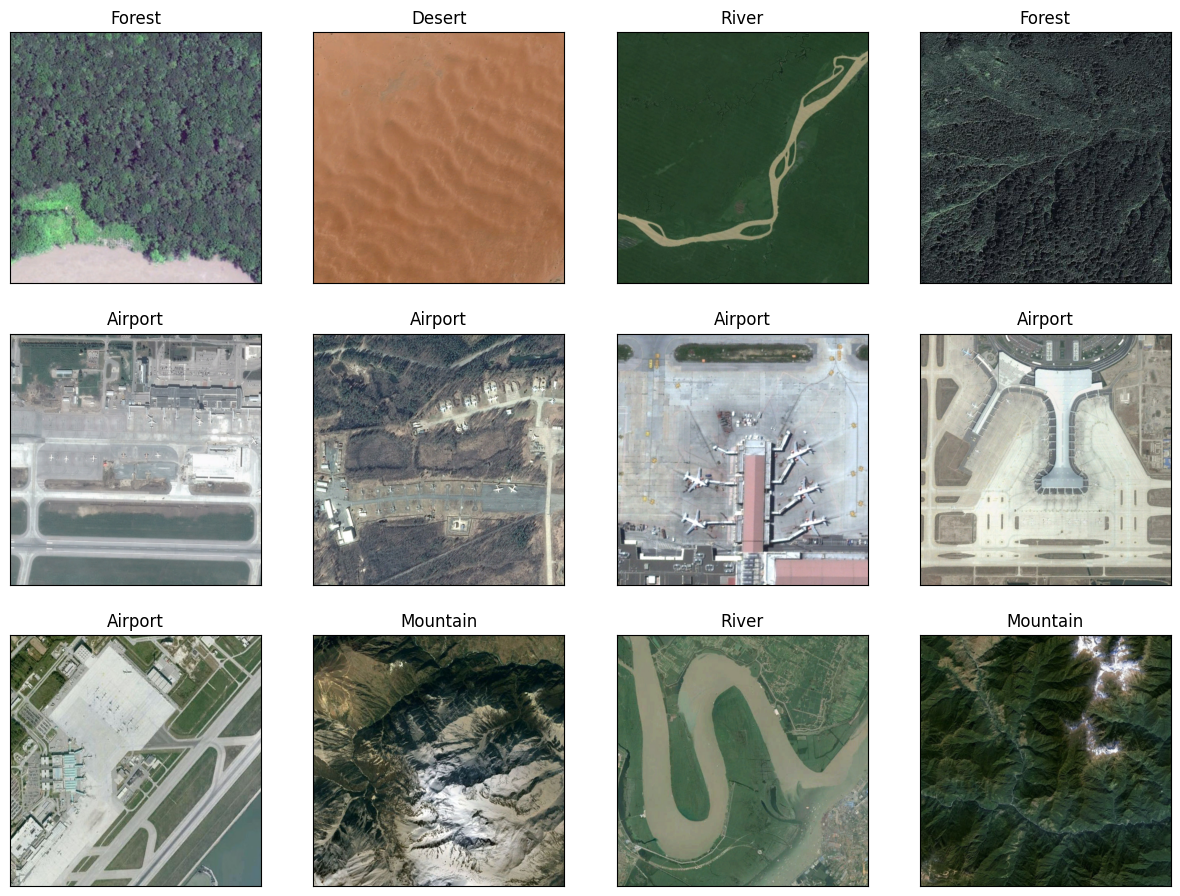

In [ ]:
#Display Images
plot_df = train_df.sample(12).reset_index()
plt.figure(figsize=(15, 15))

for i in range(12):
    img_name = plot_df.loc[i, 'Filename']
    label_str = (plot_df.loc[i, 'ClassId'])
    plt.subplot(4,4,i+1)
    plt.imshow(plt.imread(os.path.join(train_path,label_str, img_name)))
    plt.title(label_str)
    plt.xticks([])
    plt.yticks([])
    plt.yticks([])

## 3.2 Preprocessing

* Extract the features from the images and concatenate them to create a single for the every images.

* You can choose from the feature processing techniques taught in the class : Low-level Vision: Histogram and Histogram equalization, Gray-scale transformation, Image Smoothing, Connected components in images.
Mid-level Vision:  Edge Detection using Gradients, Sobel, Canny; Line detection using Hough transforms; Semantic information using RANSAC;Image region descriptor using SIFT; Use case: Pedestrian detection Using HoG and SIFT descriptors and SVM

* Create multiple sets of features and store it in seperate dataframes so that you can later use it for training and comparing the models.

* Normalize the DataFrame

* Note : If the feature size is getting too large such that it is not fitting into the RAM of Colab or your system then you can either use PCA or resize the image to smaller dimenssion for reducing the numer of features



In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(zoom_range=0.15,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.15)
test_datagen = ImageDataGenerator()
val_datagen = ImageDataGenerator()
train_generator = train_datagen.flow_from_directory(train_path,target_size=(224, 224),batch_size=32,shuffle=True)
test_generator = test_datagen.flow_from_directory(test_path,target_size=(224,224),batch_size=32,shuffle=False)
val_generator = val_datagen.flow_from_directory(val_path,target_size=(224,224),batch_size=32,shuffle=False)

Found 872 images belonging to 5 classes.
Found 109 images belonging to 5 classes.
Found 109 images belonging to 5 classes.


In [ ]:
def identity_block(X, f, filters, stage, block):

    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    F1, F2, F3 = filters

    X_shortcut = X

    X = Conv2D(filters=F1, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2a', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F2, kernel_size=(f, f), strides=(1, 1), padding='same', name=conv_name_base + '2b', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F3, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2c', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2c')(X)

    X = Add()([X, X_shortcut])# SKIP Connection
    X = Activation('relu')(X)

    return X


In [ ]:
def convolutional_block(X, f, filters, stage, block, s=2):

    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

    F1, F2, F3 = filters

    X_shortcut = X

    X = Conv2D(filters=F1, kernel_size=(1, 1), strides=(s, s), padding='valid', name=conv_name_base + '2a', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F2, kernel_size=(f, f), strides=(1, 1), padding='same', name=conv_name_base + '2b', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2b')(X)
    X = Activation('relu')(X)
    X = Conv2D(filters=F3, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2c', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2c')(X)

    X_shortcut = Conv2D(filters=F3, kernel_size=(1, 1), strides=(s, s), padding='valid', name=conv_name_base + '1', kernel_initializer=glorot_uniform(seed=0))(X_shortcut)
    X_shortcut = BatchNormalization(axis=3, name=bn_name_base + '1')(X_shortcut)

    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)

    return X

In [ ]:
def ResNet50(input_shape=(224, 224, 3)):

    X_input = Input(input_shape)

    X = ZeroPadding2D((3, 3))(X_input)

    X = Conv2D(64, (7, 7), strides=(2, 2), name='conv1', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name='bn_conv1')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((3, 3), strides=(2, 2))(X)

    X = convolutional_block(X, f=3, filters=[64, 64, 256], stage=2, block='a', s=1)
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='b')
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='c')


    X = convolutional_block(X, f=3, filters=[128, 128, 512], stage=3, block='a', s=2)
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='b')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='c')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='d')

    X = convolutional_block(X, f=3, filters=[256, 256, 1024], stage=4, block='a', s=2)
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='b')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='c')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='d')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='e')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='f')

    X = X = convolutional_block(X, f=3, filters=[512, 512, 2048], stage=5, block='a', s=2)
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='b')
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='c')

    X = AveragePooling2D(pool_size=(2, 2), padding='same')(X)

    model = Model(inputs=X_input, outputs=X, name='ResNet50')

    return model

# 4.1 Model Building - Score: 2 Marks
* Use any 1 classical machine learning algorithm such as : SVM , Xgboost etc. to train the model
* Train the model on different kinds of feature combination dataframe you created in 3.

In [ ]:
##---------Type the code below this line------------------##

## 4.2 Validation matrix - 1 Mark

Print the model accuracy and F1 Score


In [ ]:
##---------Type the answer below this line------------------##

# 5.1 Model Inference - 2 Mark

Plot any 5 random test images and their predicted and actual true labels using the model and feature set which gave you the best accuracy/F1 score.


In [ ]:
##---------Type the code below this line------------------##

Justify your choice/inution of feature selection based on the performance of model such that why a particualr set have features might have performed well.


In [ ]:
##---------Type the answers below this line------------------##

### NOTE


All Late Submissions will incur a <b>penalty of -2 marks </b>. So submit your assignments on time.

Good Luck

In [ ]:
import cv2
import numpy as np

img = cv2.imread("/content/drive/MyDrive/CV_GROUP18/Airport/airport_1.jpg", cv2.IMREAD_GRAYSCALE)

In [ ]:
#load sift, surf,orb
sift = cv2.xfeatures2d.SIFT_create()
surf = cv2.xfeatures2d.SURF_create()
orb = cv2.ORB_create(nfeatures=1500)

error: OpenCV(4.8.0) /io/opencv_contrib/modules/xfeatures2d/src/surf.cpp:1026: error: (-213:The function/feature is not implemented) This algorithm is patented and is excluded in this configuration; Set OPENCV_ENABLE_NONFREE CMake option and rebuild the library in function 'create'


In [ ]:
keypoints_sift, descriptors = sift.detectAndCompute(img, None)
keypoints_surf, descriptors = surf.detectAndCompute(img, None)
keypoints_orb, descriptors = orb.detectAndCompute(img, None)

In [ ]:
img = cv2.drawKeypoints(img, keypoints, None)

cv2.imshow("Image", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
import numpy as np
import cv2 as cv
img = cv.imread('/content/drive/MyDrive/CV_GROUP18/Airport/airport_1.jpg')
gray= cv.cvtColor(img,cv.COLOR_BGR2GRAY)
sift = cv.SIFT_create()
kp = sift.detect(gray,None)
img=cv.drawKeypoints(gray,kp,img)
cv.imwrite('sift_keypoints.jpg',img)

In [ ]:
img=cv.drawKeypoints(gray,kp,img,flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv.imwrite('sift_keypoints.jpg',img)

In [ ]:
img

In [ ]:
#Edge Detection and Image Gradients

image = cv2.imread('/content/drive/MyDrive/CV_GROUP18/Airport/airport_1.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
hgt, wdt,_ = image.shape
# Sobel Edges
x_sobel = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)
y_sobel = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)
plt.figure(figsize=(20, 20))
plt.subplot(3, 2, 1)
plt.title("Original")
plt.imshow(image)
plt.subplot(3, 2, 2)
plt.title("Sobel X")
plt.imshow(x_sobel)
plt.subplot(3, 2, 3)
plt.title("Sobel Y")
plt.imshow(y_sobel)
sobel_or = cv2.bitwise_or(x_sobel, y_sobel)
plt.subplot(3, 2, 4)
plt.imshow(sobel_or)
laplacian = cv2.Laplacian(image, cv2.CV_64F)
plt.subplot(3, 2, 5)
plt.title("Laplacian")
plt.imshow(laplacian)
## There are two values: threshold1 and threshold2.
## Those gradients that are greater than threshold2 => considered as an edge
## Those gradients that are below threshold1 => considered not to be an edge.
## Those gradients Values that are in between threshold1 and threshold2 => either classiﬁed as edges or non-edges
# The first threshold gradient
canny = cv2.Canny(image, 50, 120)
plt.subplot(3, 2, 6)
plt.imshow(canny)

In [ ]:
#Image Sharpening
image = cv2.imread('/content/drive/MyDrive/CV_GROUP18/Airport/airport_1.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(20, 20))
plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(image)
kernel_sharpening = np.array([[-1,-1,-1],
                              [-1,9,-1],
                              [-1,-1,-1]])
sharpened = cv2.filter2D(image, -1, kernel_sharpening)
plt.subplot(1, 2, 2)
plt.title("Image Sharpening")
plt.imshow(sharpened)
plt.show()

In [ ]:
#Image Blurring
image = cv2.imread('/content/drive/MyDrive/CV_GROUP18/Airport/airport_1.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(20, 20))
plt.subplot(2, 2, 1)
plt.title("Original")
plt.imshow(image)
kernel_3x3 = np.ones((3, 3), np.float32) / 9
blurred = cv2.filter2D(image, -1, kernel_3x3)
plt.subplot(2, 2, 2)
plt.title("3x3 Kernel Blurring")
plt.imshow(blurred)
kernel_7x7 = np.ones((7, 7), np.float32) / 49
blurred2 = cv2.filter2D(image, -1, kernel_7x7)
plt.subplot(2, 2, 3)
plt.title("7x7 Kernel Blurring")
plt.imshow(blurred2)

In [ ]:
#Image Contours
image = cv2.imread('/content/drive/MyDrive/CV_GROUP18/Airport/airport_1.jpg')
# Load the data
# image = cv2.imread('pic.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(20, 20))
plt.subplot(2, 2, 1)
plt.title("Original")
plt.imshow(image)
# Grayscale
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
# Canny edges
edged = cv2.Canny(gray, 30, 200)
plt.subplot(2, 2, 2)
plt.title("Canny Edges")
plt.imshow(edged)
# Finding Contours
contour, hier = cv2.findContours(edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
plt.subplot(2, 2, 3)
plt.imshow(edged)
print("Count of Contours  = " + str(len(contour)))
# All contours
cv2.drawContours(image, contours, -1, (0,255,0), 3)
plt.subplot(2, 2, 4)
plt.title("Contours")
plt.imshow(image)


In [ ]:
#Line Detection
image = cv2.imread('/content/drive/MyDrive/CV_GROUP18/Airport/airport_1.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(20, 20))
# Grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# Canny Edges
edges = cv2.Canny(gray, 100, 170, apertureSize = 3)
plt.subplot(2, 2, 1)
plt.title("edges")
plt.imshow(edges)
# Run HoughLines Fucntion
lines = cv2.HoughLines(edges, 1, np.pi/180, 200)
# Run for loop through each line
for line in lines:
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    x_1 = int(x0 + 1000 * (-b))
    y_1 = int(y0 + 1000 * (a))
    x_2 = int(x0 - 1000 * (-b))
    y_2 = int(y0 - 1000 * (a))
    cv2.line(image, (x_1, y_1), (x_2, y_2), (255, 0, 0), 2)
# Show Final output
plt.subplot(2, 2, 2)
plt.imshow(image)

In [ ]:
#Corner Detection using Harris
image = cv2.imread('/content/drive/MyDrive/CV_GROUP18/Airport/airport_1.jpg')
# Grayscaling
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 10))
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# CornerHarris function  want input to be float
gray = np.float32(gray)
h_corners = cv2.cornerHarris(gray, 3, 3, 0.05)
kernel = np.ones((7,7),np.uint8)
h_corners = cv2.dilate(h_corners, kernel, iterations = 10)
image[h_corners > 0.024 * h_corners.max() ] = [256, 128, 128]
plt.subplot(1, 1, 1)
# Final Output
plt.imshow(image)

In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 12.3 MB/s eta 0:00:00


In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import skimage as ski
import os
import ipywidgets as widgets

import glob
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import shap
import pprint

for dirname, _, filenames in os.walk('/content/drive/MyDrive/CV_GROUP18/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
NUM_CLASSES = 5

class_folders = [
    "/content/drive/MyDrive/CV_GROUP18/Airport",
    "/content/drive/MyDrive/CV_GROUP18/Desert",
    "/content/drive/MyDrive/CV_GROUP18/Forest",
    "/content/drive/MyDrive/CV_GROUP18/Mountain",
    "/content/drive/MyDrive/CV_GROUP18/River"
]
class_folders

In [ ]:
NUM_CLASSES = 2

class_folders = [
    "/content/drive/MyDrive/CV_GROUP18/Airport",
    "/content/drive/MyDrive/CV_GROUP18/Desert"
]
class_folders

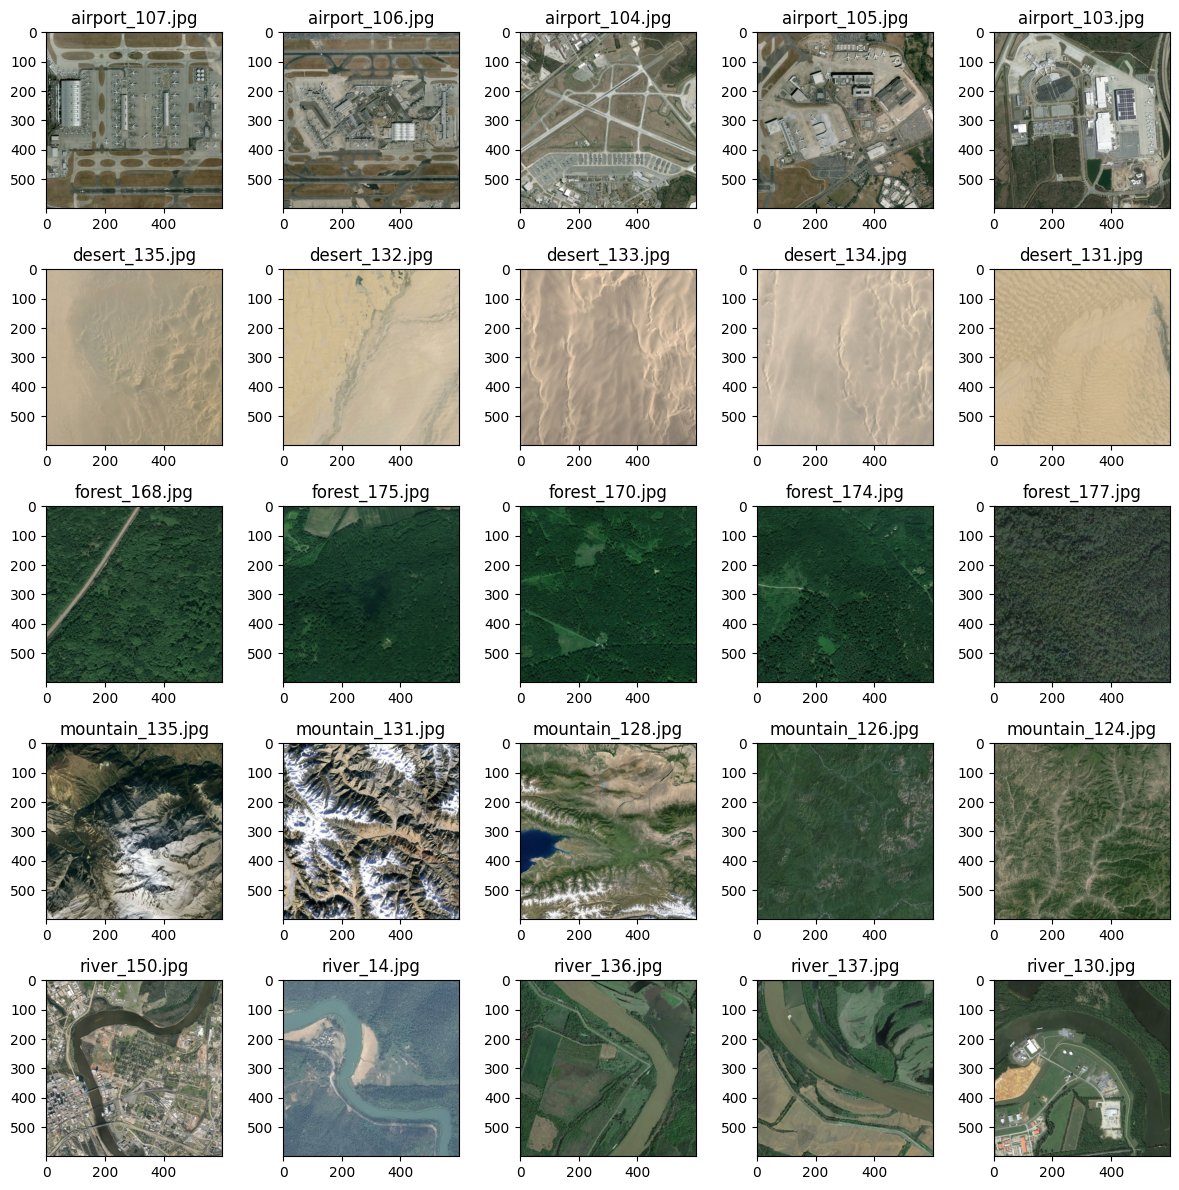

In [ ]:
fig, axs = plt.subplots(nrows=5, ncols=5, figsize=(12, 12))
for i, folder in enumerate(class_folders):
    for j, filename in enumerate(glob.glob(folder + "/*.jpg")[:5]):
        img = ski.io.imread(filename)
        axs[i,j].imshow(img)
        axs[i,j].set_title(filename.split("/")[-1].split()[0])
plt.tight_layout();

In [ ]:
num_sample_images = 1
image_dict = {}
for i, folder in enumerate(class_folders):
    image_dict[folder.split("/")[-1].split()[0]] = glob.glob(folder + "/*.jpg")[:num_sample_images]

pprint.pprint(image_dict)

{'Airport': ['/content/drive/MyDrive/CVAssignment/CV_GROUP18/Airport/airport_107.jpg'],
 'Desert': ['/content/drive/MyDrive/CVAssignment/CV_GROUP18/Desert/desert_135.jpg'],
 'Forest': ['/content/drive/MyDrive/CVAssignment/CV_GROUP18/Forest/forest_168.jpg'],
 'Mountain': ['/content/drive/MyDrive/CVAssignment/CV_GROUP18/Mountain/mountain_135.jpg'],
 'River': ['/content/drive/MyDrive/CVAssignment/CV_GROUP18/River/river_150.jpg']}


Image Processing

In [ ]:
def to_grayscale(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

def threshold_image(img, thresh_min=155, thresh_max=255):
    return cv2.threshold(img, thresh_min, thresh_max, cv2.THRESH_BINARY)[1]

def getContours(image):
    contours, hierarchy = cv2.findContours(image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    return (contours, hierarchy)

def drawContours(image, contours):
    return cv2.drawContours(image, contours, -1, (255, 0, 0), 0)

def calculateImageFeatures(contours, featcols):
    feat_array = np.zeros((1, len(featcols)), np.float32)
    mmnts =  cv2.moments(contours[0], False)
    for i, k in enumerate(sorted(mmnts.keys())):
        feat_array[0, i] = mmnts[k]

    area = cv2.contourArea(contours[0], False)

    centroid_x = mmnts['m10']/(mmnts['m00'] + 0.000000000001)
    centroid_y = mmnts['m01']/(mmnts['m00'] + + 0.000000000001)
    arcLength = cv2.arcLength(contours[0], True)

    feat_array[0, len(mmnts)] = area
    feat_array[0, len(mmnts)+1] = centroid_x
    feat_array[0, len(mmnts)+2] = centroid_y
    feat_array[0, len(mmnts)+3] = arcLength

    return feat_array

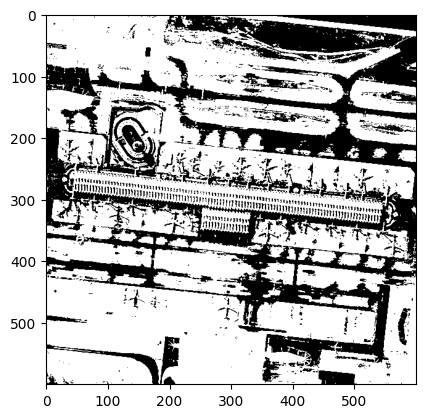

In [ ]:
sample_thresh = threshold_image(to_grayscale(cv2.imread("/content/drive/MyDrive/CV_GROUP18/Airport/airport_1.jpg")))
plt.imshow(sample_thresh, cmap='gray')

In [ ]:
cnts, h = getContours(sample_thresh)
sample_moments = cv2.moments(cnts[0], False)

feature_cols = list(sorted(sample_moments.keys())) + ["area", "centroidx", "centroidy", "length"]
pprint.pprint(feature_cols)

sample_features = calculateImageFeatures(cnts, feature_cols)
pprint.pprint(sample_features)

['m00',
 'm01',
 'm02',
 'm03',
 'm10',
 'm11',
 'm12',
 'm20',
 'm21',
 'm30',
 'mu02',
 'mu03',
 'mu11',
 'mu12',
 'mu20',
 'mu21',
 'mu30',
 'nu02',
 'nu03',
 'nu11',
 'nu12',
 'nu20',
 'nu21',
 'nu30',
 'area',
 'centroidx',
 'centroidy',
 'length']
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2.]], dtype=float32)


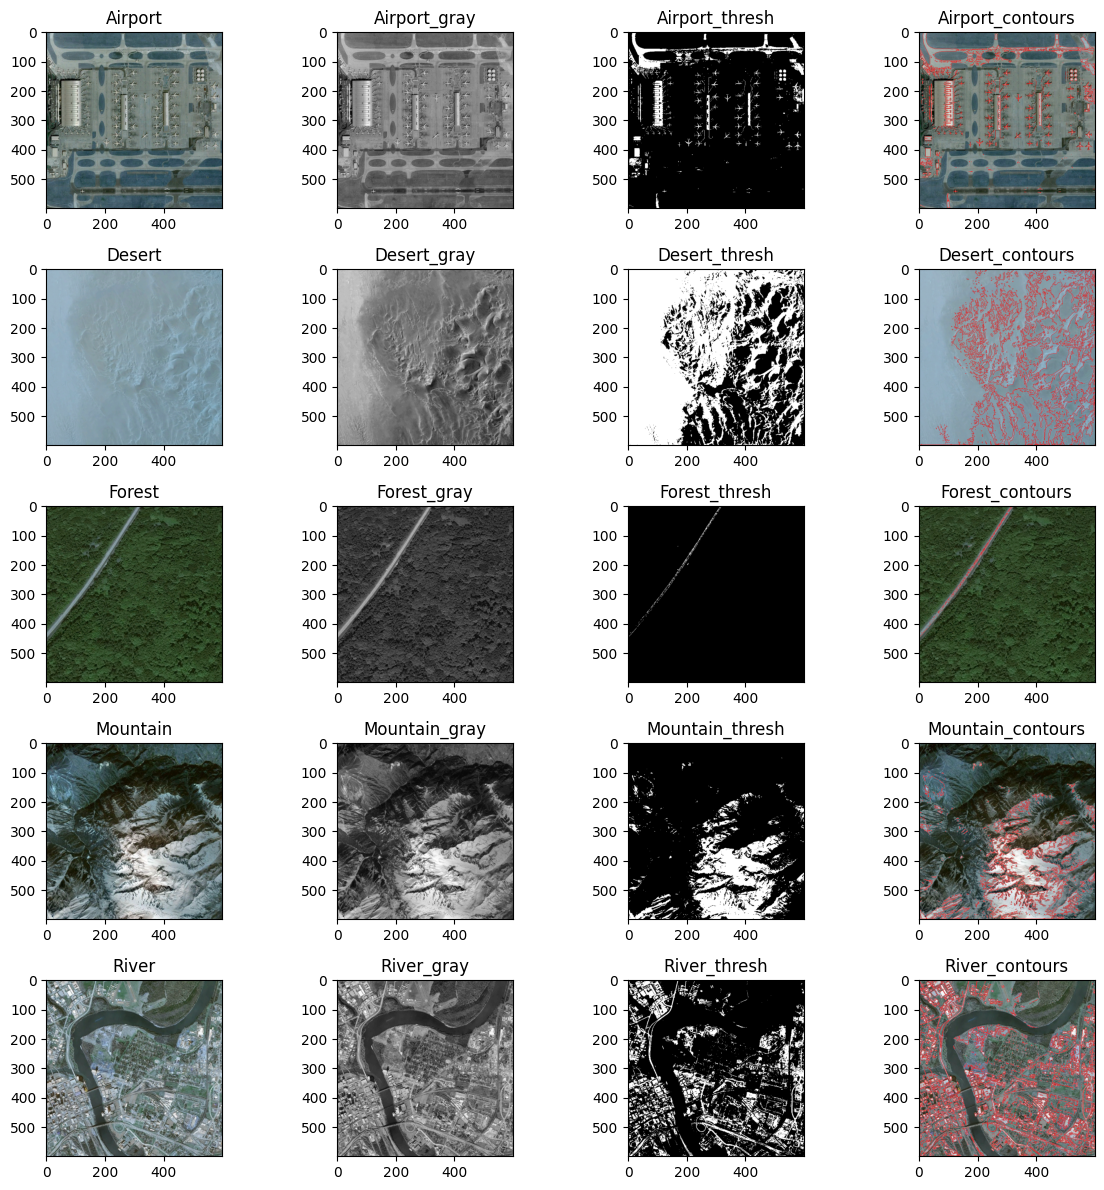

In [ ]:
fig, axs = plt.subplots(nrows=5, ncols=num_sample_images*4, figsize=(12, 12))
for i, (k,v) in enumerate(image_dict.items()):
    for j, image_path in enumerate(v):
        img = cv2.imread(image_path)
        gray = to_grayscale(img)
        thresh = threshold_image(gray)

        cnts, h = getContours(thresh)
        withConts = drawContours(img.copy(), cnts)

        axs[i,j].imshow(img)
        axs[i,j].set_title(k)

        axs[i,j+1].imshow(gray, cmap='gray')
        axs[i,j+1].set_title(k + "_gray")

        axs[i,j+2].imshow(thresh, cmap='gray')
        axs[i,j+2].set_title(k + "_thresh")

        axs[i,j+3].imshow(withConts)
        axs[i,j+3].set_title(k + "_contours")

plt.tight_layout();

In [ ]:
classes = list(image_dict.keys())
classes

['Airport', 'Desert', 'Forest', 'Mountain', 'River']

In [ ]:
classwise_feature_dict = {}
classwise_img_dict = {}
error_images = []


for i, folder in enumerate(class_folders):
    img_class = folder.split("/")[-1].split()[0]
    array_lst = list()
    img_path_lst = list()

    for j, filename in enumerate(glob.glob(folder + "/*.jpg")):
        try:
            img = cv2.imread(filename)
            array_lst.append(calculateImageFeatures(getContours(threshold_image(to_grayscale(img).copy()).copy())[0], feature_cols))
            img_path_lst.append(filename)
        except Exception as err:
            error_images.append((img_class,filename))
            print(err)
            raise err
            break

    all_class_features = np.vstack(array_lst)
    classwise_feature_dict[img_class] = all_class_features
    classwise_img_dict[img_class] = img_path_lst
    print(f"Image Class: {img_class}")
    print(f"Total Images: {all_class_features.shape[0]}")
    print("--------------------------------------------")

In [ ]:
classwise_feature_dict = {}
classwise_img_dict = {}
error_images = []


for i, folder in enumerate(class_folders):
    img_class = folder.split("/")[-1].split()[0]
    array_lst = list()
    img_path_lst = list()

    for j, filename in enumerate(glob.glob(folder + "/*.jpg")):
        try:
            img = cv2.imread(filename)
            array_lst.append(calculateImageFeatures(getContours(threshold_image(to_grayscale(img).copy()).copy())[0], feature_cols))
            img_path_lst.append(filename)
        except Exception as err:
            error_images.append((img_class,filename))
            print(err)
            raise err
            break
    #print(len(array_lst))
    all_class_features = np.vstack(array_lst)
    classwise_feature_dict[img_class] = all_class_features
    classwise_img_dict[img_class] = img_path_lst
    print(f"Image Class: {img_class}")
    print(f"Total Images: {all_class_features.shape[0]}")
    print("--------------------------------------------")

In [ ]:
all_class_features.shape[0]

In [ ]:
TOTAL_TRAIN_SAMPLES = 500
TOTAL_TEST_SAMPLES = 160

In [ ]:
X_train, y_train = np.zeros((TOTAL_TRAIN_SAMPLES, len(feature_cols)), np.float32), np.zeros((TOTAL_TRAIN_SAMPLES, 1), np.float32)
X_test, y_test = np.zeros((TOTAL_TEST_SAMPLES, len(feature_cols)), np.float32), np.zeros((TOTAL_TEST_SAMPLES, 1), np.float32)
class_map = dict()

for i, (k, v) in enumerate(classwise_feature_dict.items()):
        class_map[i] = k
        X_train[i*500:(i+1)*500, :] = v[:500, :]
        y_train[i*500:(i+1)*500, :] = i

        X_test[i*160:(i+1)*160] = v[160:, :]
        y_test[i*160:(i+1)*160, :] = i

In [ ]:
pprint.pprint(class_map)

In [ ]:
for i in range(X_train.shape[-1]):
    ss = StandardScaler()
    ss.fit(X_train[:, i].reshape((-1, 1)))
    X_train[:, i] = ss.transform(X_train[:, i].reshape((-1, 1))).flatten()
    X_test[:, i] = ss.transform(X_test[:, i].reshape((-1, 1))).flatten()

In [ ]:
model = RandomForestClassifier(n_estimators = 100)
model.fit(X_train, y_train.ravel())

y_pred = model.predict(X_test)

print("ACCURACY OF THE MODEL: ", accuracy_score(y_test, y_pred))

In [ ]:
cm = confusion_matrix(y_test,y_pred)
cm

In [ ]:
print(classification_report(y_test, y_pred))